#### ArXiv and Wiki Tools ??

In [1]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [2]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)

arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Quary ArXiv for Papers")

In [ ]:
arxiv.name

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [6]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)

wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki, description="Query Wikipedia for Articles")

In [7]:
wiki.name

'wikipedia'

In [8]:
wiki.invoke("What is LangGraph?")

'Page: List of unsolved problems in mathematics\nSummary: Many mathematical problems have been stated but not yet solved. These problems come from many areas of mathematics, such as theoretical physics, computer science, algebra, analysis, combinatorics, algebraic, differential, discrete and Euclidean geometries, graph theory, group theory, model theory, number theory, set theory, Ramsey theory, dynamical systems, and partial differential equations. Some problems belong to more than one discipline'

#### Seting Enviroment Variables ??

In [9]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

#### Tavily Search Tool ??

In [11]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [12]:
tavily.invoke("Provide me with the latest news on AI")

[{'title': 'The latest AI news we announced in June - Google Blog',
  'url': 'https://blog.google/technology/ai/google-ai-updates-june-2025/',
  'content': "# The latest AI news we announced in June\n\nJul 02, 2025\n\nHere’s a recap of some of our biggest AI updates from June, including more ways to search with AI Mode, a new way to share your NotebookLM notebooks publicly, and a new AI to help researchers better understand the human genome.\n\nSuperG\n\n## Basic explainer [...] Search finds new voice, and photos bright,  \nWhile Chromebooks gain AI's keenest edge,  \nAnd learning's path is filled with light.\n\nGenomes unlock, from knowledge pledge,  \nAnd robots learn, with vision clear,  \nWhile cancer's foe meets AI's siege.\n\nFrom Google's labs, new AI doth spring,  \nWith Gemini's models taking flight,  \nAnd tools for coders, joy to bring.\n\nSearch finds new voice, and photos bright,  \nWhile Chromebooks gain AI's keenest edge,  \nAnd learning's path is filled with light. [...

#### combining ALL Tools To Work Together ??

In [16]:
tools = [arxiv, wiki, tavily]

#### Initialize LLM Model ??

In [13]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.3-70b-versatile")

In [14]:
llm.invoke("Explain me Quantum Supremacy in simple terms")

AIMessage(content='Quantum Supremacy is a term used to describe when a quantum computer can perform a specific task that is beyond the capabilities of a classical computer. In other words, it\'s when a quantum computer can solve a problem that is too difficult or time-consuming for a regular computer to handle.\n\nThink of it like a competition between a classical computer (like the one you\'re using now) and a quantum computer. The goal is to perform a specific calculation or task, and whoever finishes first wins.\n\nClassical computers use "bits" to process information, which can only be in one of two states: 0 or 1. Quantum computers, on the other hand, use "qubits" (quantum bits), which can exist in multiple states at the same time. This property, called superposition, allows quantum computers to process vast amounts of information simultaneously.\n\nIn 2019, Google announced that it had achieved Quantum Supremacy by performing a specific calculation on a quantum computer that woul

In [17]:
llm_with_tools = llm.bind_tools(tools)

#### Execute Some Tests ??

In [18]:
llm_with_tools.invoke("What is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'gd14tgqj3', 'function': {'arguments': '{"query":"latest research on quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 404, 'total_tokens': 423, 'completion_time': 0.058638903, 'prompt_time': 0.037569857, 'queue_time': 0.107076673, 'total_time': 0.09620876}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3f3b593e33', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dcd7d076-dd68-4f9b-9816-582581d6a7c0-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'latest research on quantum computing'}, 'id': 'gd14tgqj3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 404, 'output_tokens': 19, 'total_tokens': 423})

In [19]:
llm_with_tools.invoke("What is Machine Learning?")

AIMessage(content='<function=wikipedia{"query": "Machine Learning"}</function>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 400, 'total_tokens': 415, 'completion_time': 0.03310368, 'prompt_time': 0.036239944, 'queue_time': 0.086340051, 'total_time': 0.069343624}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_e91e6fbd56', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--8852ea20-64d3-496a-8d02-6315c71117f8-0', usage_metadata={'input_tokens': 400, 'output_tokens': 15, 'total_tokens': 415})

#### Starting LangGraph Workflow ???

In [20]:
from typing_extensions import TypedDict            ## Labeling
from langchain_core.messages import AnyMessage     ## HumanMessage or AIMessage
from typing import Annotated                       ## Labeling
from langgraph.graph.message import add_messages   ## Reducers in LangGraph

from langgraph.graph.message import add_messages ->  
that add_messages is used as a Reducer Which is Used To Append new messages inseat of overwriting it

In [21]:
### AgentState Schema
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]  ## List of messages

In [22]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [23]:
## Node Definition
def tool_calling_llm (state: AgentState):
    """Node to call LLM with tools."""
    
    return {
        "messages": [llm_with_tools.invoke(state["messages"])]
    }

In [24]:
## Building the Graph
builder = StateGraph(AgentState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

In [25]:
## Adding the Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is not a tool call -> tools_condition routes to llm
    tools_condition,
)

In [27]:
## Build the graph
graph = builder.compile()

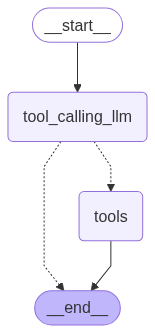

In [32]:
## Display the graph
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages = graph.invoke({
    "messages": "1706.03762"
})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (88pw208v9)
 Call ID: 88pw208v9
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [35]:
def Run_Graph(query: str):
    """
    Function to run the graph with a given query.
    """
    messages = graph.invoke({
        "messages": query
    })
    
    for message in messages["messages"]:
        message.pretty_print()

In [36]:
Run_Graph("What is the latest research on quantum computing?")

================================ Human Message =================================

What is the latest research on quantum computing?
================================== Ai Message ==================================

<function=arxiv{"query": "quantum computing"}</function>


In [37]:
Run_Graph("AI News and Trends")

================================ Human Message =================================

AI News and Trends
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (w0dw0vcn2)
 Call ID: w0dw0vcn2
  Args:
    query: AI news and trends
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "6 AI trends you'll see more of in 2025 - Microsoft News", "url": "https://news.microsoft.com/source/features/ai/6-ai-trends-youll-see-more-of-in-2025/", "content": "“We’ll start to see these tools having a measurable impact on the throughput of the people and institutions who are working on these huge problems, such as designing sustainable materials and accelerating development of life-saving drugs,” Llorens says.\n\nIn 2025, one trend is certain: AI will continue to drive innovation and unlock new potential for people and organizations around the globe.\n\n_Illustrations 

#### Create another Graph that loop back to the LLM after tool calls ??

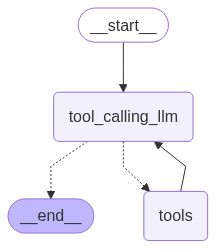

In [38]:
## Building the Graph
builder2 = StateGraph(AgentState)
builder2.add_node("tool_calling_llm", tool_calling_llm)
builder2.add_node("tools", ToolNode(tools))


## Adding the Edges
builder2.add_edge(START, "tool_calling_llm")
builder2.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is not a tool call -> tools_condition routes to llm
    tools_condition,
)
builder2.add_edge("tools", "tool_calling_llm")  ## Adding an edge to loop back to the LLM after tool calls


## Build the graph
graph2 = builder2.compile()


## Display the graph
from IPython.display import display, Image

display(Image(graph2.get_graph().draw_mermaid_png()))

In [42]:
def Run_Graph2(query: str):
    """
    Function to run the graph with a given query.
    """
    messages = graph2.invoke({
        "messages": query
    })
    
    for message in messages["messages"]:
        message.pretty_print()

In [45]:
Run_Graph2("What is the latest research on quantum computing?")

================================ Human Message =================================

What is the latest research on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  arxiv (4sd69naaw)
 Call ID: 4sd69naaw
  Args:
    query: latest research on quantum computing
================================= Tool Message =================================
Name: arxiv

Published: 2023-01-27
Title: A Living Review of Quantum Computing for Plasma Physics
Authors: Óscar Amaro, Diogo Cruz
Summary: Quantum Computing promises accelerated simulation of certain classes of
problems, in particular in plasma physics. Given the nascent interest in
applying quantum computing techniques to study plasma systems, a compendium of
the relevant literature would be most useful. As a novel field, new results are
common, and it is important for researchers to stay up-to-date on the
================================== Ai Message ==================================
Too

In [44]:
Run_Graph2("AI News and Trends")

================================ Human Message =================================

AI News and Trends
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (5d9n2s0mf)
 Call ID: 5d9n2s0mf
  Args:
    query: AI news and trends
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "6 AI trends you'll see more of in 2025 - Microsoft News", "url": "https://news.microsoft.com/source/features/ai/6-ai-trends-youll-see-more-of-in-2025/", "content": "“We’ll start to see these tools having a measurable impact on the throughput of the people and institutions who are working on these huge problems, such as designing sustainable materials and accelerating development of life-saving drugs,” Llorens says.\n\nIn 2025, one trend is certain: AI will continue to drive innovation and unlock new potential for people and organizations around the globe.\n\n_Illustrations 